In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
raw_df=pd.read_excel('2022_Q1_OR_Utilization.xlsx',index_col=0)

In [4]:
raw_df.describe()

,OR Suite,CPT Code,Booked Time (min)
count,2172.000000,2172.000000,2172.000000
mean,4.288674,44881.405617,77.189227
std,2.163514,18087.419079,30.430015
min,1.000000,14060.000000,30.000000
25%,3.000000,28296.000000,60.000000
50%,4.000000,42826.000000,60.000000
75%,6.000000,66982.000000,90.000000
max,8.000000,69436.000000,180.000000


In [5]:
raw_df.groupby('Service')['Booked Time (min)'].mean().reset_index().sort_values(by='Booked Time (min)', ascending=False).round(decimals=2)

,Service,Booked Time (min)
6,Plastic,110.43
1,General,110.00
2,OBGYN,97.50
7,Podiatry,89.51
4,Orthopedics,87.38
9,Vascular,68.24
0,ENT,67.01
8,Urology,66.06
5,Pediatrics,60.00
3,Ophthalmology,44.64


In [6]:
raw_df['Preperation_time']=(raw_df['Start Time']-raw_df['Wheels In']).astype('timedelta64[m]').astype(int)
raw_df['Actual_time']=(raw_df['Wheels Out']-raw_df['Wheels In']).astype('timedelta64[m]').astype(int)
raw_df

,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out,Preperation_time,Actual_time
Encounter ID,,,,,,,,,,,,,
10001,2022-01-03,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,2022-01-03 07:00:00,2022-01-03 07:05:00,2022-01-03 07:32:00,2022-01-03 09:05:00,2022-01-03 09:17:00,27,132
10002,2022-01-03,1,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60,2022-01-03 08:45:00,2022-01-03 09:48:00,2022-01-03 10:13:00,2022-01-03 11:01:00,2022-01-03 11:12:00,25,84
10003,2022-01-03,1,Podiatry,28297,Lapidus bunionectomy,150,2022-01-03 10:00:00,2022-01-03 11:50:00,2022-01-03 12:20:00,2022-01-03 12:42:00,2022-01-03 12:58:00,30,68
10004,2022-01-03,1,Podiatry,28296,Bunionectomy with distal osteotomy,120,2022-01-03 12:45:00,2022-01-03 13:29:00,2022-01-03 13:53:00,2022-01-03 14:50:00,2022-01-03 15:02:00,24,93
10005,2022-01-03,2,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,2022-01-03 07:00:00,2022-01-03 07:15:00,2022-01-03 07:50:00,2022-01-03 09:38:00,2022-01-03 09:51:00,35,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12168,2022-03-31,7,Pediatrics,69421,"Myringotomy, general anesthesia",60,2022-03-31 10:45:00,2022-03-31 11:59:00,2022-03-31 12:11:00,2022-03-31 12:39:00,2022-03-31 12:51:00,12,52
12169,2022-03-31,7,Pediatrics,69421,"Myringotomy, general anesthesia",60,2022-03-31 12:00:00,2022-03-31 13:20:00,2022-03-31 13:47:00,2022-03-31 14:14:00,2022-03-31 14:28:00,27,68
12170,2022-03-31,8,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,2022-03-31 07:00:00,2022-03-31 07:06:00,2022-03-31 07:45:00,2022-03-31 09:06:00,2022-03-31 09:18:00,39,132


In [7]:
raw_df.sort_values(by=['Date','OR Suite','OR Schedule'])

,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out,Preperation_time,Actual_time
Encounter ID,,,,,,,,,,,,,
10001,2022-01-03,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,2022-01-03 07:00:00,2022-01-03 07:05:00,2022-01-03 07:32:00,2022-01-03 09:05:00,2022-01-03 09:17:00,27,132
10002,2022-01-03,1,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60,2022-01-03 08:45:00,2022-01-03 09:48:00,2022-01-03 10:13:00,2022-01-03 11:01:00,2022-01-03 11:12:00,25,84
10003,2022-01-03,1,Podiatry,28297,Lapidus bunionectomy,150,2022-01-03 10:00:00,2022-01-03 11:50:00,2022-01-03 12:20:00,2022-01-03 12:42:00,2022-01-03 12:58:00,30,68
10004,2022-01-03,1,Podiatry,28296,Bunionectomy with distal osteotomy,120,2022-01-03 12:45:00,2022-01-03 13:29:00,2022-01-03 13:53:00,2022-01-03 14:50:00,2022-01-03 15:02:00,24,93
10005,2022-01-03,2,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,2022-01-03 07:00:00,2022-01-03 07:15:00,2022-01-03 07:50:00,2022-01-03 09:38:00,2022-01-03 09:51:00,35,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12168,2022-03-31,7,Pediatrics,69421,"Myringotomy, general anesthesia",60,2022-03-31 10:45:00,2022-03-31 11:59:00,2022-03-31 12:11:00,2022-03-31 12:39:00,2022-03-31 12:51:00,12,52
12169,2022-03-31,7,Pediatrics,69421,"Myringotomy, general anesthesia",60,2022-03-31 12:00:00,2022-03-31 13:20:00,2022-03-31 13:47:00,2022-03-31 14:14:00,2022-03-31 14:28:00,27,68
12170,2022-03-31,8,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,2022-03-31 07:00:00,2022-03-31 07:06:00,2022-03-31 07:45:00,2022-03-31 09:06:00,2022-03-31 09:18:00,39,132


In [8]:
raw_df[(raw_df['OR Schedule']==raw_df['Start Time']) & (raw_df['Start Time'].dt.hour==7)].sort_values(['Date','OR Suite','OR Schedule'])

,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out,Preperation_time,Actual_time
Encounter ID,,,,,,,,,,,,,


In [9]:
raw_df['case_delay']=(raw_df['Wheels In']-raw_df['OR Schedule']).astype('timedelta64[m]').astype(int)

In [10]:
raw_df[(raw_df['OR Schedule'].dt.strftime('%H:%M')=='07:00') & (raw_df['case_delay']<=5)]

,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out,Preperation_time,Actual_time,case_delay
Encounter ID,,,,,,,,,,,,,,
10001,2022-01-03,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,2022-01-03 07:00:00,2022-01-03 07:05:00,2022-01-03 07:32:00,2022-01-03 09:05:00,2022-01-03 09:17:00,27,132,5
10007,2022-01-03,3,Ophthalmology,66982,Extracapsular cataract removal,45,2022-01-03 07:00:00,2022-01-03 07:03:00,2022-01-03 07:13:00,2022-01-03 07:31:00,2022-01-03 07:38:00,10,35,3
10015,2022-01-03,4,OBGYN,58562,"Hysterectomy, surgical",120,2022-01-03 07:00:00,2022-01-03 07:03:00,2022-01-03 07:23:00,2022-01-03 08:40:00,2022-01-03 08:54:00,20,111,3
10042,2022-01-04,3,Ophthalmology,66982,Extracapsular cataract removal,45,2022-01-04 07:00:00,2022-01-04 07:03:00,2022-01-04 07:13:00,2022-01-04 07:31:00,2022-01-04 07:38:00,10,35,3
10050,2022-01-04,4,OBGYN,58562,"Hysterectomy, surgical",120,2022-01-04 07:00:00,2022-01-04 07:03:00,2022-01-04 07:23:00,2022-01-04 08:40:00,2022-01-04 08:54:00,20,111,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12115,2022-03-30,4,OBGYN,58562,"Hysterectomy, surgical",120,2022-03-30 07:00:00,2022-03-30 07:03:00,2022-03-30 07:23:00,2022-03-30 08:40:00,2022-03-30 08:54:00,20,111,3
12144,2022-03-31,3,Ophthalmology,66982,Extracapsular cataract removal,45,2022-03-31 07:00:00,2022-03-31 07:03:00,2022-03-31 07:13:00,2022-03-31 07:31:00,2022-03-31 07:38:00,10,35,3
12152,2022-03-31,4,OBGYN,58562,"Hysterectomy, surgical",120,2022-03-31 07:00:00,2022-03-31 07:03:00,2022-03-31 07:23:00,2022-03-31 08:40:00,2022-03-31 08:54:00,20,111,3


In [11]:
b_df=raw_df.groupby('Service')['Booked Time (min)'].mean().reset_index().sort_values(by='Booked Time (min)', ascending=False).round(decimals=2)

In [12]:
a_df=raw_df.groupby('Service')['Actual_time'].mean().reset_index().sort_values(by='Actual_time', ascending=False).round(decimals=2)

In [13]:

b_df=b_df.set_index('Service')
a_df=a_df.set_index('Service')

In [14]:
a_df['Actual_time']-b_df['Booked Time (min)']

Service
ENT               2.09
General           3.00
OBGYN            -5.75
Ophthalmology    -8.77
Orthopedics      13.58
Pediatrics        6.00
Plastic          -7.01
Podiatry          4.82
Urology           4.70
Vascular         12.94
dtype: float64

### Booked Time vs Actual time spend in or Room accuracy 

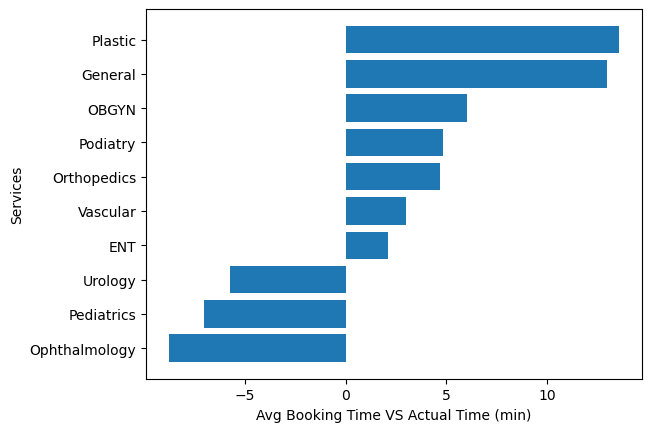

In [321]:

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

services = b_df.index
y_pos = np.arange(len(services))
performance =(a_df['Actual_time']-b_df['Booked Time (min)']).sort_values(ascending=False)


ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=services)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Services')
ax.set_xlabel('Avg Booking Time VS Actual Time (min)')


plt.show()

In [16]:
scheduled_hours=(raw_df['OR Schedule'].dt.hour)
scheduled_hours=scheduled_hours.unique()

In [17]:
raw_df['scheduled_hours']=raw_df['OR Schedule'].dt.hour

In [258]:
raw_df['scheduled_hours'].unique()

array([ 7,  8, 10, 12,  9, 11, 13, 14, 15])

In [265]:
dealy_df=(raw_df[['Date','scheduled_hours']].value_counts())

In [272]:
dealy_df=dealy_df.reset_index().set_index('Date')

### Busy Hours By  Case

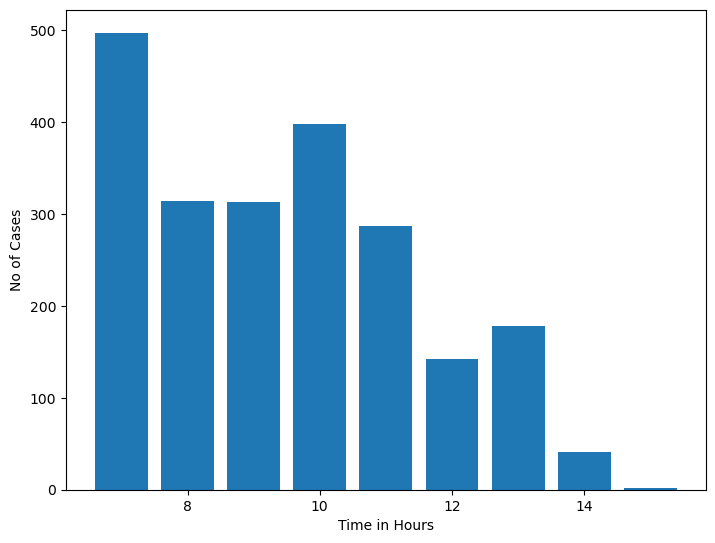

In [319]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
hours = dealy_df['scheduled_hours'].unique()
Cases = dealy_df.groupby('scheduled_hours')[0].sum()
ax.bar(hours,Cases)
ax.set_ylabel('No of Cases')
ax.set_xlabel('Time in Hours')
plt.show()

In [311]:
case_delay_by_5min=raw_df[raw_df['case_delay']<=5]

In [312]:
case_delay_by_5min

,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out,Preperation_time,Actual_time,case_delay,scheduled_hours
Encounter ID,,,,,,,,,,,,,,,
10001,2022-01-03,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,2022-01-03 07:00:00,2022-01-03 07:05:00,2022-01-03 07:32:00,2022-01-03 09:05:00,2022-01-03 09:17:00,27,132,5,7
10007,2022-01-03,3,Ophthalmology,66982,Extracapsular cataract removal,45,2022-01-03 07:00:00,2022-01-03 07:03:00,2022-01-03 07:13:00,2022-01-03 07:31:00,2022-01-03 07:38:00,10,35,3,7
10008,2022-01-03,3,Ophthalmology,66982,Extracapsular cataract removal,45,2022-01-03 08:00:00,2022-01-03 08:00:00,2022-01-03 08:12:00,2022-01-03 08:30:00,2022-01-03 08:41:00,12,41,0,8
10009,2022-01-03,3,Ophthalmology,66982,Extracapsular cataract removal,45,2022-01-03 09:00:00,2022-01-03 09:04:00,2022-01-03 09:15:00,2022-01-03 09:30:00,2022-01-03 09:39:00,11,35,4,9
10010,2022-01-03,3,Ophthalmology,66982,Extracapsular cataract removal,45,2022-01-03 10:00:00,2022-01-03 10:01:00,2022-01-03 10:12:00,2022-01-03 10:26:00,2022-01-03 10:34:00,11,33,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12150,2022-03-31,3,Ophthalmology,66982,Extracapsular cataract removal,45,2022-03-31 13:00:00,2022-03-31 12:55:00,2022-03-31 13:06:00,2022-03-31 13:20:00,2022-03-31 13:29:00,11,34,-5,13
12151,2022-03-31,3,Ophthalmology,66982,Extracapsular cataract removal,45,2022-03-31 14:00:00,2022-03-31 13:50:00,2022-03-31 14:02:00,2022-03-31 14:20:00,2022-03-31 14:29:00,12,39,-10,14
12152,2022-03-31,4,OBGYN,58562,"Hysterectomy, surgical",120,2022-03-31 07:00:00,2022-03-31 07:03:00,2022-03-31 07:23:00,2022-03-31 08:40:00,2022-03-31 08:54:00,20,111,3,7
